<div style="border: 2px solid red; padding: 10px; border-radius: 5px;">
<strong>Notebook description:</strong>
    
This notebook plots FGSEA enrichment results of K/L clusters from ABCA7 LoF neurons for excitatory neurons tested against the common variants

<strong>Input Data:</strong>

`common_variant_fgsa.ipynb` outputs


<strong>Figures:</strong>

`Fig2`

<strong>Last Run All:</strong>
June 17, 2025


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
color_dict = {'PM.3': (0.847, 0.106, 0.376, 1.0),
 'PM.4': (0.902, 0.318, 0.0, 1.0),
 'PM.2': (1.0, 0.549, 0.0, 1.0),
 'T+C.29': (1.0, 0.718, 0.302, 1.0),
 'PM.1': (0.082, 0.396, 0.753, 1.0),
 'PM.5': (0.18, 0.49, 0.196, 1.0),
 'PM.0': (0.941, 0.384, 0.573, 1.0),
 'T.12': (0.259, 0.647, 0.961, 1.0),
 'T.11': (0.4, 0.733, 0.416, 1.0),
 'G.20': (0.89, 0.106, 0.137, 1.0),
 'T.8': (0.6, 0.196, 0.8, 1.0),
 'G.23': (1.0, 0.843, 0.0, 1.0),
 'PM.7': (0.251, 0.878, 0.816, 1.0),
 'G.18': (0.647, 0.165, 0.165, 1.0),
 'PM.6': (0.0, 0.5, 0.5, 1.0),
 'T.9': (1.0, 0.0, 1.0, 1.0)}

In [3]:
sns.set_theme(style="white", context="talk")
import matplotlib as mpl
# For PDF output:
mpl.rcParams['pdf.fonttype'] = 42      # 42 = TrueType (editable)
# For SVG output:
mpl.rcParams['svg.fonttype'] = 'none' 

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Helvetica', 'Arial']

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


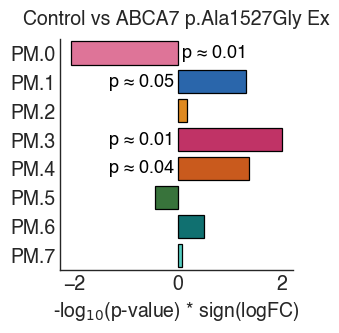

In [4]:
# FINAL PANEL
data = pd.read_csv('../../processed_data/fgsea_rs3752246.csv')
data = data.sort_values(by='pathway')
data.reset_index(drop=True, inplace=True)

plt.figure(figsize=(3, 3))
sns.barplot(y='pathway', x='score', data=data, hue='pathway', palette=color_dict, dodge=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('-log$_{10}$(p-value) * sign(logFC)', fontsize=14)
plt.ylabel('', fontsize=14)
#ax.legend_.remove()
ax.tick_params(axis='both', which='both', direction='in', length=5, labelsize=14)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_linewidth(0)   # if you want to keep it hidden
ax.spines['right'].set_linewidth(0) 
#ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

# Annotate the bars with the scores
for index, row in data.iterrows():
    if index == 0:
        plt.text(0.7, index, f'p ≈ {row["pval"]:.2f}', color='black', ha="center", va="center", fontsize=13, fontstyle='italic')
    else:
        if row['pval'] < 0.1:
            plt.text(-0.7, index, f'p ≈ {row["pval"]:.2f}', color='black', ha="center", va="center", fontsize=13, fontstyle='italic')


# Outline each bar
for patch in ax.patches:
    patch.set_edgecolor('black')
    patch.set_linewidth(.9)

plt.title('Control vs ABCA7 p.Ala1527Gly Ex', fontsize=14, pad=10)
plt.savefig('../../editorial_paper/main_panels_svgs/fig2/rs3752246_fgsea_barplot.pdf', dpi=300, bbox_inches='tight')

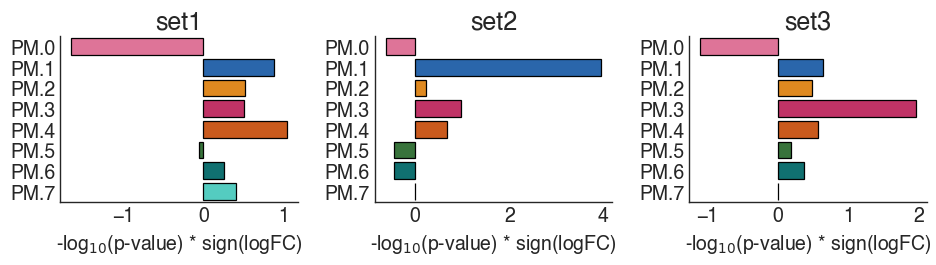

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your list of layer identifiers
layers = ['set1', 'set2', 'set3']

# Create a 4x4 grid of subplots and flatten the array of axes
fig, axs = plt.subplots(1, 5, figsize=(16, 3))
axs = axs.flatten()  # now axs is a 1D array

# Loop over each layer, load the data, and plot on a separate axis
for j, i in enumerate(layers):
    data = pd.read_csv(f'../../processed_data/fgsea_rs3752246_{i}.csv')
    data = data.sort_values(by='pathway')
    data.reset_index(drop=True, inplace=True)
    
    # Plot the barplot on the j-th axis
    sns.barplot(y='pathway', x='score', data=data, hue='pathway', 
                palette=color_dict, dodge=False, ax=axs[j])
    
    # Remove the legend if you don't need multiple ones
    if axs[j].get_legend() is not None:
        axs[j].get_legend().remove()
    
    # Adjust the spines and labels
    axs[j].spines['top'].set_visible(False)
    axs[j].spines['right'].set_visible(False)
    axs[j].set_xlabel('-log$_{10}$(p-value) * sign(logFC)', fontsize=14)
    axs[j].set_ylabel('', fontsize=14)
    axs[j].tick_params(axis='both', which='both', direction='in', length=5, labelsize=14)
    axs[j].spines['bottom'].set_linewidth(1)
    axs[j].spines['left'].set_linewidth(1)
    axs[j].spines['top'].set_linewidth(0)
    axs[j].spines['right'].set_linewidth(0)
    
    # Outline each bar
    for patch in axs[j].patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(0.9)
    
    # Set title from a dictionary if you have one
    axs[j].set_title(i)

# Remove any unused subplots (if there are more axes than layers)
for k in range(len(layers), len(axs)):
    fig.delaxes(axs[k])

plt.tight_layout()
plt.show()


In [6]:
### plot scores
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def get_scores_per_cluster(data, frame, cluster_column):
    g_names  = np.array(frame['description'][frame['is_gene']])
    scores = pd.DataFrame(data['score'])
    scores.columns = ['iN']
    SCORES = np.array(scores.loc[g_names])

    names = np.unique(frame[cluster_column])
    temp = [SCORES[frame[cluster_column][frame['is_gene']]==i] for i in names]

    return dict(zip(names, temp))


frame_pm = pd.read_csv('../../processed_data/pm_kl_frame.csv', index_col=0)
scores = pd.read_csv('../../processed_data/all_scores_0825.csv', index_col=0)
scores['score'] = scores['Ex']
frame_pm['cluster'] = ['PM.'+str(i) for i in frame_pm['cluster']]
scores_pm = get_scores_per_cluster(scores, frame_pm, 'cluster')

common_scores = pd.read_csv('../../common_variant_data/degs_rs3752246.csv', index_col=0)
common_scores['score'] = -np.log10(common_scores['P.Value'])*np.sign(common_scores['logFC'])
x = frame_pm[frame_pm['is_gene']]
x = x[[i in set(common_scores.index) for i in x['description']]]
scores_common = get_scores_per_cluster(common_scores, x, 'cluster')

In [7]:
# Create a list of rows
rows = []
for key, arr in scores_common.items():
    # Ensure we flatten the array in case it's two-dimensional
    for val in arr:
        rows.append([key, val[0]])  # use val[0] since each val is a 1-element array

# Create the DataFrame
df_common = pd.DataFrame(rows, columns=['Key', 'Value'])
df_common['group'] = 'common'

# Create a list of rows
rows = []
for key, arr in scores_pm.items():
    # Ensure we flatten the array in case it's two-dimensional
    for val in arr:
        rows.append([key, val[0]])  # use val[0] since each val is a 1-element array

# Create the DataFrame
df_pm = pd.DataFrame(rows, columns=['Key', 'Value'])
df_pm['group'] = 'pm'

In [8]:
df = pd.concat([df_common, df_pm])


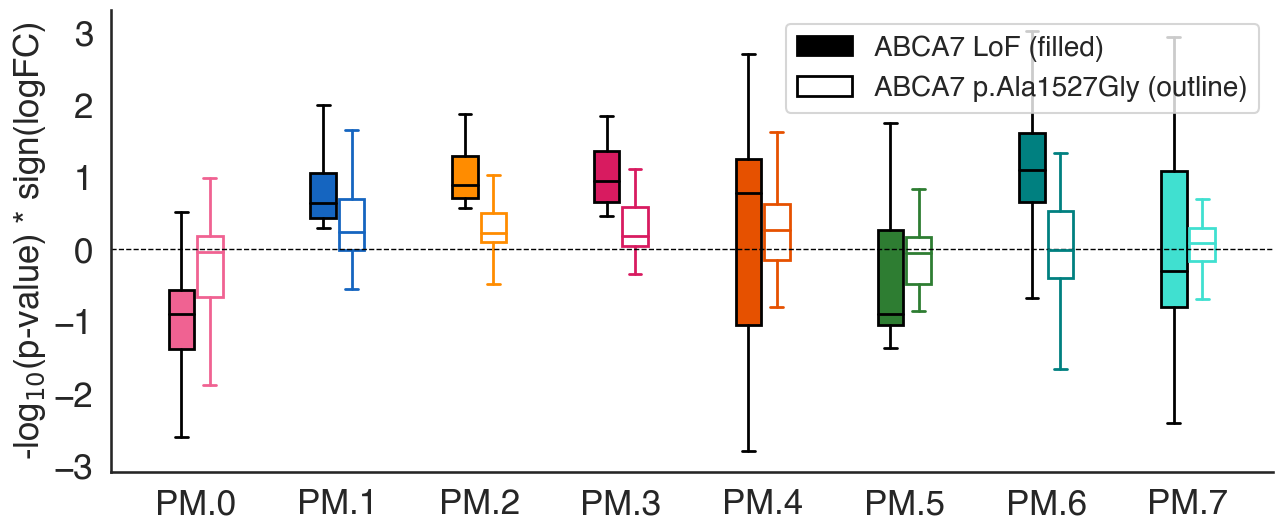

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the order of the keys and a palette dictionary mapping each key to a color.
order = sorted(df['Key'].unique())
palette = color_dict.values #['#1f77b4', '#ff7f0e']  # example colors; update as needed
#palette_dict = dict(zip(order, palette))

# Create a mapping from each key to its numerical position
mapping = {k: i for i, k in enumerate(order)}
offset = 0.1  # offset value to shift boxes apart

fig, ax = plt.subplots(figsize=(15, 6))

# Loop over each key and plot the two groups with a slight offset
for name,key in enumerate(order):
    pos = mapping[key]
    color = color_dict[key]
    
    # Plot for the "common" group (filled box)
    data_common = df[(df['Key'] == key) & (df['group'] != 'common')]['Value']
    if not data_common.empty:
        bp_common = ax.boxplot(data_common,
                               positions=[pos - offset],
                               widths=0.18,
                               patch_artist=True,
                               showfliers=False)
        for patch in bp_common['boxes']:
            patch.set_facecolor(color)
            patch.set_linewidth(2)
            #patch.set_edgecolor(color)
        for line in bp_common['whiskers']:
            line.set_color('black')
            line.set_linewidth(2)
        for line in bp_common['caps']:
            line.set_color('black')
            line.set_linewidth(2)
        for line in bp_common['medians']:
            line.set_color('black')
            line.set_linewidth(2)
    
    # Plot for the non-common group (outline only)
    data_other = df[(df['Key'] == key) & (df['group'] == 'common')]['Value']
    if not data_other.empty:
        bp_other = ax.boxplot(data_other,
                              positions=[pos + offset],
                              widths=0.18,
                              patch_artist=True,
                              showfliers=False)
        for patch in bp_other['boxes']:
            patch.set_facecolor('none')
            patch.set_edgecolor(color)
            patch.set_linewidth(2)
        # Update the whiskers, caps, and medians to use the same color and linewidth
        for line in bp_other['whiskers']:
            line.set_color(color)
            line.set_linewidth(2)
        for line in bp_other['caps']:
            line.set_color(color)
            line.set_linewidth(2)
        for line in bp_other['medians']:
            line.set_color(color)
            line.set_linewidth(2)

# Set the x-axis ticks and labels to reflect the original keys
ax.set_xticks(list(mapping.values()))
ax.set_xticklabels(order)
# Add a horizontal line at y=0
ax.axhline(y=0, color='black', linewidth=1, linestyle='--')

# Remove the top and right axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create custom legend
import matplotlib.patches as mpatches

# Define custom legend elements
legend_elements = [
    mpatches.Patch(facecolor='black', edgecolor='black', linewidth=2, label='ABCA7 LoF (filled)'),
    mpatches.Patch(facecolor='none', edgecolor='black', linewidth=2, label='ABCA7 p.Ala1527Gly (outline)')
]

ax.set_ylabel('-log$_{10}$(p-value) * sign(logFC)', fontsize=20)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper right')


# Increase font size for everything
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)

# Increase font size for the legend
ax.legend(handles=legend_elements, loc='upper right', fontsize=20)

# Save the figure to a file
plt.savefig('../../paper/main_plots/common_variant_boxplot.png', format='png', dpi=300, bbox_inches='tight')
